# Modelo Linear 

## Mínimos quadrados

Sejam os pontos $(x_1, y_1), ..., (x_n,y_n)$. A reta que minimiza $\sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i))^2$ segundo $\beta_0$ e $\beta_1$ tem inclinação e intecepto

$$
\hat{\beta}_1 = \dfrac{\sum_{i=1}^n (y_i - \bar{y})(x_i - \bar{x})}{\sum_{i=1}^n (x_i - \bar{x})^2}
$$

$$
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}
$$

A verificação desse resultado é direta ao derivar o funcional objetivo com respeito aos parâmetros e igualando a 0. Além disso, observar que a Hessiana é definida positiva, o que garante a existência do mínimo local (que nesse caso será global). 

In [26]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import t
from statsmodels.regression.linear_model import OLS
plt.style.use('ggplot')

ro = np.random.RandomState(10000)

Vamos gerar os $n$ pontos e calcular a reta que minimiza os mínimos quadrados.

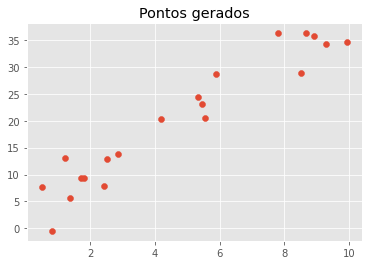

In [2]:
n = 20
x = ro.uniform(0,10, size = n)
epsilon = ro.normal(0, scale = 3, size = n)
beta0, beta1 = ro.uniform(0,10, size = 2)
y = beta0 + beta1*x + epsilon

plt.scatter(x,y)
plt.title('Pontos gerados')
plt.show()

Estimando os coeficientes

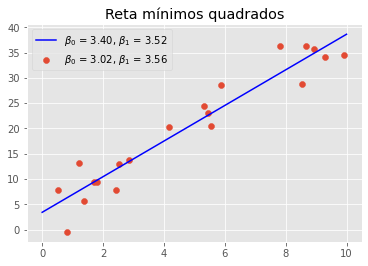

In [3]:
beta1_hat = np.dot(y - y.mean(), x - x.mean())/np.dot(x - x.mean(), x - x.mean())
beta0_hat = y.mean() - beta1_hat*x.mean()

t = np.linspace(0,10,1000)
plt.scatter(x,y, label = r'$\beta_0$ = {:.2f}, $\beta_1$ = {:.2f}'.format(beta0, beta1))
plt.plot(t,beta0_hat + beta1_hat*t, color = 'blue', label = r'$\beta_0$ = {:.2f}, $\beta_1$ = {:.2f}'.format(beta0_hat, beta1_hat))
plt.legend()
plt.title('Reta mínimos quadrados')
plt.show()

Agora vamos usar numpy para a estimação. Observe que o resultado coincide com o calculado usando a fórmula derivada. 

In [4]:
# adiciona coluna de 1 para lidar com o beta_0
xlinha = np.c_[np.ones(n),x]   
sol, _, _, _ = np.linalg.lstsq(xlinha, y, rcond = None)
print(sol)

[3.40285283 3.52323316]


### Várias variáveis 

Nesse caso, queremos encontrar um hiperplano que minimiza 

$$
Q = \sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_{i1} + \dots + \beta_k x_{ik}))^2
$$

Nesse caso teremos $k+1$ equações para resolver. 

## Regressão

Dizemos que $X_1, \dots, X_k$ são preditores e $Y$ é a resposta. A esperança condicional da resposta dados os preditores é chamada de função regressão. Assim a regressão de $Y$ sobre $X_1, \dots, X_k$ depende dos valores $x_1, \dots, x_k$ assumidos pelos preditores. Vamos assumir que estamos com uma regressão linear e, portanto, 

$$
E[Y|x_1,\dots,x_k] = \beta_0 + \beta_1 x_1 + \dots \beta_k x_k
$$

onde os coeficientes $\beta_j$ são coeficientes de regressão, que são desconhecidos (parâmetros do modelo). 

### Regressão Linear Simples 

Nesse caso $Y = \beta_0 + \beta_1 x + \varepsilon$ para cada $X = x$ e, em geral, $\varepsilon \sim N(0, \sigma^2)$. 

Assumimos que 

1. Os preditores são conhecidos; 
2. A distribuição de $Y$ condicionada em $x_1, ..., x_n$ é normal. 
3. A média condicional é linear com parâmetros $\beta_0$ e $\beta_1$.
4. Homoscedasticidade, isto é, variância constante. 
5. Independência das respostas dadas as covariáveis. 

**Teorema:** Os estimadores de máxima verossimilhança de $\beta_0$ e $\beta_1$ são os de mínimos quadrados e de $\sigma^2$ é 
$$
\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{\beta}_0 - \hat{\beta}_1x_i)^2
$$

**Distribuição dos estimadores:** Considere os estimadores de mínimos quadrados como função das variáveis aleatórias $Y_1,...,Y_n$ dados os preditores $x_1,...,x_n$.

$$
\hat{\beta}_1 \sim \mathcal{N}(\beta_1, \sigma^2/s_x^2)
$$

$$
\hat{\beta}_0 \sim \mathcal{N}\left(\beta_0, \sigma^2\left(\frac{1}{n} + \frac{\bar{x}^2}{s_x^2}\right)\right)
$$

tal que $Cov(\hat{\beta}_0, \hat{\beta}_1) = \frac{\bar{x}\sigma^2}{s_x^2}$. Em particular a distribuição conjunta desses parâmetros é uma normal bivariada com as médias, vaiâncias e covariância especificadas acima. *As distribuições são todas condicionadas em $X_i = x_i$.*

Além disso, se $n \ge 3, \hat{\sigma}^2$ é independente de $(\hat{\beta}_0, \hat{\beta}_1)$ e $n\hat{\sigma}^2/\sigma^2$ tem distribuição $\chi^2$ com $n-2$ graus de liberdade.

## Inferência sobre regressão linear simples

### Teste de hipóteses sobre os coeficientes 

Defina 
$$
S^2 = \sum_{i=1}^n (Y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2
$$
$$
\sigma ' = \left(\dfrac{S^2}{n-2}\right)^{1/2}
$$

Sejam $c_0, c_1$ e $\bar{c}$ números especificados onde $c_i \neq 0$ para algum $i$ e suponha que queiramos testar 

$$
H_0: c_0 \beta_0 + c_1 \beta_1 = \bar{c}
$$
$$
H_1: c_0 \beta_0 + c_1 \beta_1 \neq \bar{c}
$$

Para cada $\alpha_0 \in (0,1)$ um teste de hipóteses com nível $\alpha_0$ é rejeitar $H_0$ se $|U| \ge T_{n-2}^{-1}(1 - \alpha_0/2)$, onde 
$$
U = \left[\frac{c_0^2}{n} + \frac{(c_0\bar{x} - c_1)^2}{s_x^2}\right]^{-1/2}\left(\frac{c_0\hat{\beta}_0 + c_1\hat{\beta}_1 - \bar{c}}{\sigma '}\right)
$$

Para ver isso, basta olhar a variável $W$ que tem distribuição normal padrão

$$
W = \left[\frac{c_0^2}{n} + \frac{(c_0\bar{x} - c_1)^2}{s_x^2}\right]^{-1/2}\left(\frac{c_0\hat{\beta}_0 + c_1\hat{\beta}_1 - \bar{c}}{\sigma}\right)
$$

e que $S^2/\sigma^2 \sim \chi^2_{n-2}$ 

A mesma derivação pode ser usada para testes unilaterais. A diferença é que rejeitaremos quando 
$$
U \ge T_{n-2}^{-1}(1 - \alpha_0)
$$
quando a hipótese nula é uma desiguldade do tipo menor igual ou 
$$
U \le -T_{n-2}^{-1}(1 - \alpha_0)
$$
quando é do tipo maior ou igual. 

**Exemplo:** Vamos testar a hipótese de que $\beta_1 = 0$ em relação a curva anterior. Só para lembrar: 

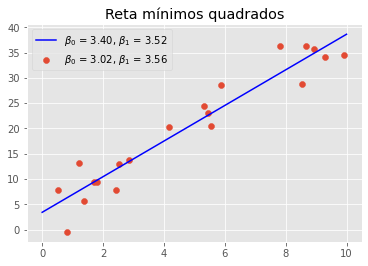

In [5]:
t = np.linspace(0,10,1000)
plt.scatter(x,y, label = r'$\beta_0$ = {:.2f}, $\beta_1$ = {:.2f}'.format(beta0, beta1))
plt.plot(t,beta0_hat + beta1_hat*t, color = 'blue', label = r'$\beta_0$ = {:.2f}, $\beta_1$ = {:.2f}'.format(beta0_hat, beta1_hat))
plt.legend()
plt.title('Reta mínimos quadrados')
plt.show()

Nesse caso temos $c_0 = \bar{c} = 0$ e $c_1 = 1$. Assim:

In [19]:
# O denominador da divisão é n - ddof
sx2 = np.var(x, ddof = n - 1)
S2 = sum((y - beta0_hat - beta1_hat*x)**2)
sigma_prime = (S2/(n-2))**(1/2)
# Estatística de teste
U = np.sqrt(sx2)*beta1_hat/sigma_prime

Seja $\alpha_0 = 0.05$ o nível de significância

In [22]:
alpha0 = 0.05
abs(U) >= t.ppf(1 - alpha0/2, df = n-2)

True

Como isso é verdade, rejeitamos a hipótese nula!

### Intervalos de confiança 

Temos que $c_0\hat{\beta}_0 + c_1\hat{\beta}_1 \pm \sigma '\left[\frac{c_0^2}{n} + \frac{(c_0\bar{x} - c_1)^2}{s_x^2}\right]^{1/2}T_{n-2}^{-1}\left(1 - \frac{\alpha_0}{2}\right)$ é un intervalo de confiança $1 - \alpha_0$ para $c_0\beta_0 + c_1\beta_1$. Para encontrar esse intervalo basta encontrar o conjunto de todos os valores $\bar{c}$ para que a hipótese nula seja rejeitada a nível de significância $\alpha_0$. 

No nosso exemplo, um intervalo para $\beta_1$ é 

In [24]:
[beta1_hat - sigma_prime*(1/np.sqrt(sx2))*t.ppf(1 - alpha0/2, df = n-2), 
 beta1_hat + sigma_prime*(1/np.sqrt(sx2))*t.ppf(1 - alpha0/2, df = n-2)]

[3.00233584703191, 4.044130469815932]

Usando o pacote `statsmodels`

In [37]:
model = OLS(y,xlinha)
result = model.fit()
print(result.params)

[3.40285283 3.52323316]


Observe que os parâmetros estimados são os mesmo que encontramos com `numpy` e na mão. Também observe que o tvalor calculado coincide com nossa estatística U

In [47]:
print('Nossa: {}'.format(U))
print('Statsmodels: {}'.format(result.tvalues[1]))

Nossa: 14.210167788464632
Statsmodels: 14.21016778846464


Podemos colocar $c_0 = 0$ e $c_1 = 1$ e obteremos o intervalo de confiança como desejávamos!

In [48]:
result.t_test([0,1])

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             3.5232      0.248     14.210      0.000       3.002       4.044